Scraping DataSet From **Reddit** using *praw*





In [1]:
!pip install praw
import praw
reddit = praw.Reddit(client_id='gjin2lXgM8CYw6rjuNIfJA', client_secret='Vkof6BhymxjJrlNldl3NvQo3yYZFDA', user_agent='bdma')


     |████████████████████████████████| 176 kB 5.1 MB/s 
     |████████████████████████████████| 52 kB 1.8 MB/s 


In [35]:
import pandas as pd
import datetime
posts = []
ml_subreddit = reddit.subreddit('depression')
for post in ml_subreddit.hot(limit=1000):
    posts.append([post.id,post.title, post.score,  post.subreddit, post.url, post.num_comments, post.selftext,post.subreddit,
                  datetime.datetime.fromtimestamp(post.created)])
posts = pd.DataFrame(posts,columns=['id','title', 'score',  'subreddit', 'url', 'num_comments', 'body','subreddit', 'created'])
print(posts)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

         id  ...             created
0    doqwow  ... 2019-10-29 14:52:02
1    plr86v  ... 2021-09-10 18:54:40
2    r935g3  ... 2021-12-05 00:25:49
3    r94itg  ... 2021-12-05 01:42:48
4    r8zv6r  ... 2021-12-04 21:41:27
..      ...  ...                 ...
967  r7hjzc  ... 2021-12-02 21:16:46
968  r7c90d  ... 2021-12-02 17:17:09
969  r7h8rx  ... 2021-12-02 21:02:42
970  r72t3d  ... 2021-12-02 08:28:09
971  r7h2v6  ... 2021-12-02 20:55:24

[972 rows x 9 columns]


In [4]:
posts.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Our most-broken and least-understood rules is ...,2363,doqwow,depression,https://www.reddit.com/r/depression/comments/d...,180,We understand that most people who reply immed...,1.572361e+09
1,Regular check-in post with a note about our re...,360,plr86v,depression,https://www.reddit.com/r/depression/comments/p...,872,Welcome to /r/depression's check-in post - a p...,1.631300e+09
2,I wish I could die in my sleep,299,r935g3,depression,https://www.reddit.com/r/depression/comments/r...,53,"I don’t want to kill myself, I just want it to...",1.638664e+09
3,I filled up a FB stranger in need’s gas tank t...,81,r94itg,depression,https://www.reddit.com/r/depression/comments/r...,15,I’ve been very depressed. \n\nAnd drinking my ...,1.638669e+09
4,"29, just came to a self realization that I hav...",79,r8zv6r,depression,https://www.reddit.com/r/depression/comments/r...,8,Everything seemed fine when I was in high-scho...,1.638654e+09


In [5]:
posts.shape

(975, 8)

In [36]:
from google.colab import drive
drive.mount('/content/drive')
posts.to_csv('/content/drive/MyDrive/BDMA/Reddit_Uncleaned.csv')




**Reddit** Data Pre-Processing.


In [11]:
%cd /content/drive/MyDrive/BDMA/

/content/drive/MyDrive/BDMA


In [37]:
df = pd.read_csv('Reddit_Uncleaned.csv')
df.head()

,Unnamed: 0,id,title,score,subreddit,url,num_comments,body,subreddit.1,created
0,0,doqwow,Our most-broken and least-understood rules is ...,2369,depression,https://www.reddit.com/r/depression/comments/d...,180,We understand that most people who reply immed...,depression,2019-10-29 14:52:02
1,1,plr86v,Regular check-in post with a note about our re...,365,depression,https://www.reddit.com/r/depression/comments/p...,872,Welcome to /r/depression's check-in post - a p...,depression,2021-09-10 18:54:40
2,2,r935g3,I wish I could die in my sleep,329,depression,https://www.reddit.com/r/depression/comments/r...,56,"I don’t want to kill myself, I just want it to...",depression,2021-12-05 00:25:49
3,3,r94itg,I filled up a FB stranger in need’s gas tank t...,102,depression,https://www.reddit.com/r/depression/comments/r...,18,I’ve been very depressed. \n\nAnd drinking my ...,depression,2021-12-05 01:42:48
4,4,r8zv6r,"29, just came to a self realization that I hav...",81,depression,https://www.reddit.com/r/depression/comments/r...,9,Everything seemed fine when I was in high-scho...,depression,2021-12-04 21:41:27


In [38]:
df = df.filter(['body','score','num_comments','created'], axis=1)
df.head()

,body,score,num_comments,created
0,We understand that most people who reply immed...,2369,180,2019-10-29 14:52:02
1,Welcome to /r/depression's check-in post - a p...,365,872,2021-09-10 18:54:40
2,"I don’t want to kill myself, I just want it to...",329,56,2021-12-05 00:25:49
3,I’ve been very depressed. \n\nAnd drinking my ...,102,18,2021-12-05 01:42:48
4,Everything seemed fine when I was in high-scho...,81,9,2021-12-04 21:41:27


In [41]:
fav_max = np.max(df['score'])
rt_max = np.max(df['num_comments'])

fav = df[df.score == fav_max].index[0]
rt = df[df.num_comments == rt_max].index[0]

print("\nThe tweet with more likes is: \n{}".format(df['body'][fav]))
print("Number of likes: {}".format(fav_max))

print("\nThe tweet with more retweets is: \n{}".format(df['body'][rt]))
print("Number of retweets: {}".format(rt_max))


The tweet with more likes is: 
We understand that most people who reply immediately to an OP with an invitation to talk privately  mean only to help, but this type of response usually leads to either disappointment or disaster.  it usually works out quite differently here than when you say "PM me anytime" in a casual social context.  

We have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content - even more so because we know that so many of you are struggling yourselves.  We're hard at work behind the scenes on more information and resources to make it easier to give and get quality help here - this is just a small start.  

Our new wiki page explains in detail why it's much better to respond in public comments, at least until you've gotten to know someone.  It will be maintained at /r/depression/wiki/private_contact, and the full text of the current version is below.

*****

###Summary###

**A

*Create time series for the data:*


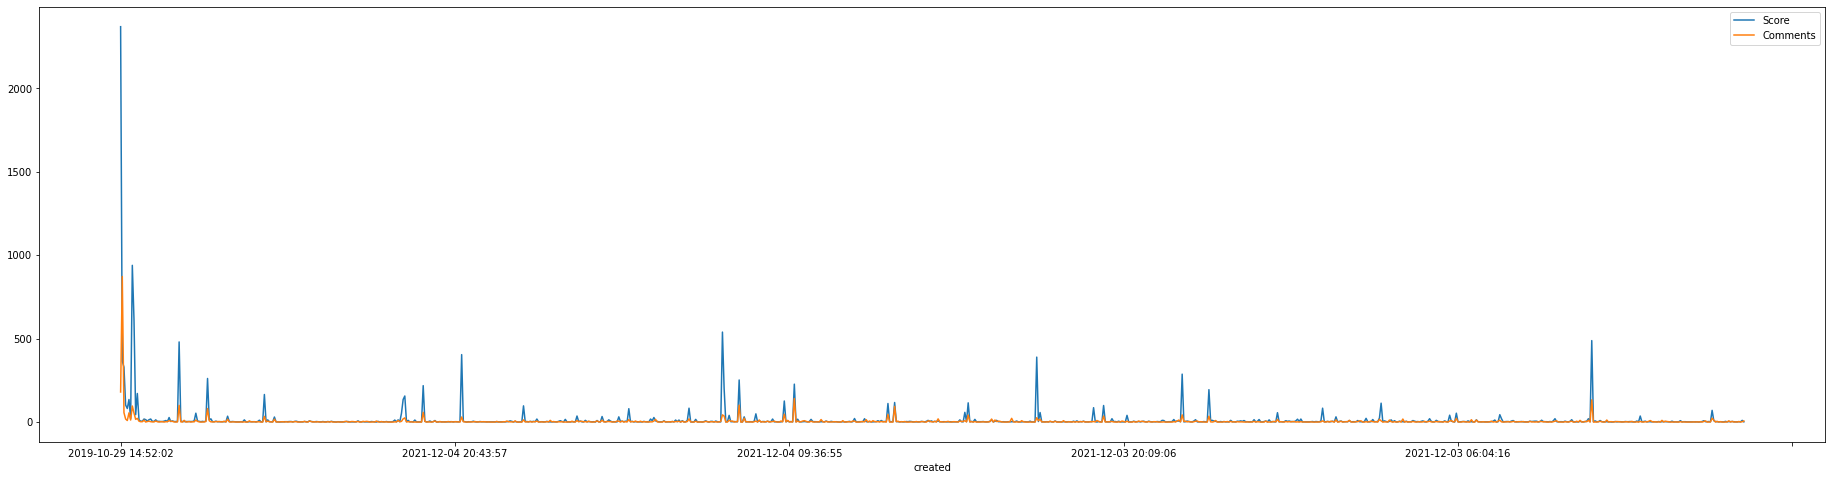

In [43]:
tfav = pd.Series(data=df['score'].values, index=df['created'])
tret = pd.Series(data=df['num_comments'].values, index=df['created'])

tfav.plot(figsize=(32,8), label="Score", legend=True)
tret.plot(figsize=(32,8), label="Comments", legend=True)

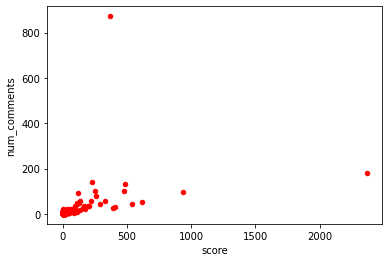

In [44]:
df.plot.scatter(x='score',y='num_comments',c='r')

In [45]:

df = df.filter(['body'], axis=1)
df.head()

,body
0,We understand that most people who reply immed...
1,Welcome to /r/depression's check-in post - a p...
2,"I don’t want to kill myself, I just want it to..."
3,I’ve been very depressed. \n\nAnd drinking my ...
4,Everything seemed fine when I was in high-scho...


*Data Cleaning*

In [50]:
import string 
import re

In [52]:
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', str(tweet))
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip('') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff') 
    return tweet
#

df['clean_comment'] = df['body'].apply(processTweet)
df.head()

,body,clean_comment
0,We understand that most people who reply immed...,understand that most people who reply immedia...
1,Welcome to /r/depression's check-in post - a p...,welcome depression check post place take momen...
2,"I don’t want to kill myself, I just want it to...",don’ want kill myself just want happen natura...
3,I’ve been very depressed. \n\nAnd drinking my ...,’ been very depressed and drinking feelings ov...
4,Everything seemed fine when I was in high-scho...,everything seemed fine when was high school ha...


*Sentiment Categorizing*

In [65]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [60]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

    
df['category'] = df['clean_comment'].apply(analyze_sentiment)
df.head()

,body,clean_comment,category
0,We understand that most people who reply immed...,understand that most people who reply immedia...,1
1,Welcome to /r/depression's check-in post - a p...,welcome depression check post place take momen...,1
2,"I don’t want to kill myself, I just want it to...",don’ want kill myself just want happen natura...,1
3,I’ve been very depressed. \n\nAnd drinking my ...,’ been very depressed and drinking feelings ov...,1
4,Everything seemed fine when I was in high-scho...,everything seemed fine when was high school ha...,1


In [63]:
positives = df['category'][df.category == 1]
negatives = df['category'][df.category == -1]
neutrals = df['category'][df.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  459
number of negative categorized text is: 470
number of neutral categorized text is: 43
total length of the data is:            972


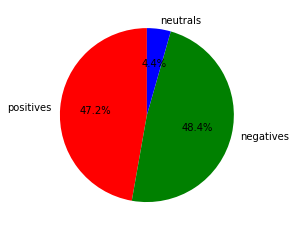

In [66]:
slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [70]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [72]:
import string
from nltk.corpus import stopwords
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['depression','suicide','kill','depressed','hated','cry','…','death’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_comment'].apply(text_process) # tokenize style 1
df['no_depression'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()

,body,clean_comment,category,no_depression
0,We understand that most people who reply immed...,understand that most people who reply immedia...,1,"[understand, people, reply, immediately, invit..."
1,Welcome to /r/depression's check-in post - a p...,welcome depression check post place take momen...,1,"[welcome, check, post, place, take, moment, sh..."
2,"I don’t want to kill myself, I just want it to...",don’ want kill myself just want happen natura...,1,"[don’, want, want, happen, naturally, ’, much,..."
3,I’ve been very depressed. \n\nAnd drinking my ...,’ been very depressed and drinking feelings ov...,1,"[’, drinking, feelings, past, year, broke, wen..."
4,Everything seemed fine when I was in high-scho...,everything seemed fine when was high school ha...,1,"[everything, seemed, fine, high, school, prepp..."


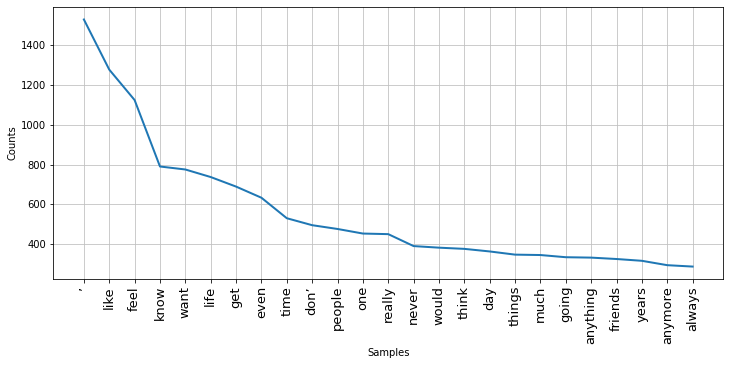

Text(0.5, 0, 'Word Rank')

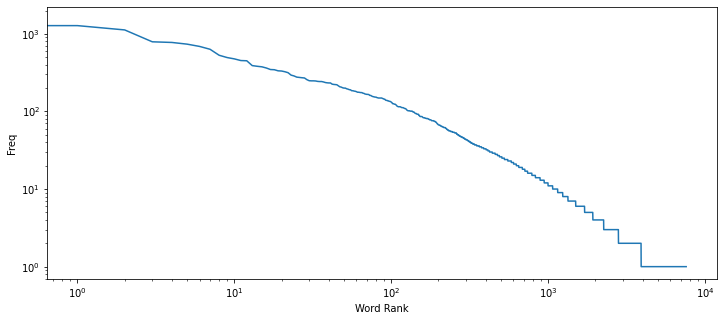

In [76]:
no_deppr = []
import collections
for ls in df['no_depression']:
    words = [w for w in ls]
    for word in words:
        no_deppr.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_deppr)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_deppr 
word_counts = sorted(collections.Counter(no_deppr).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

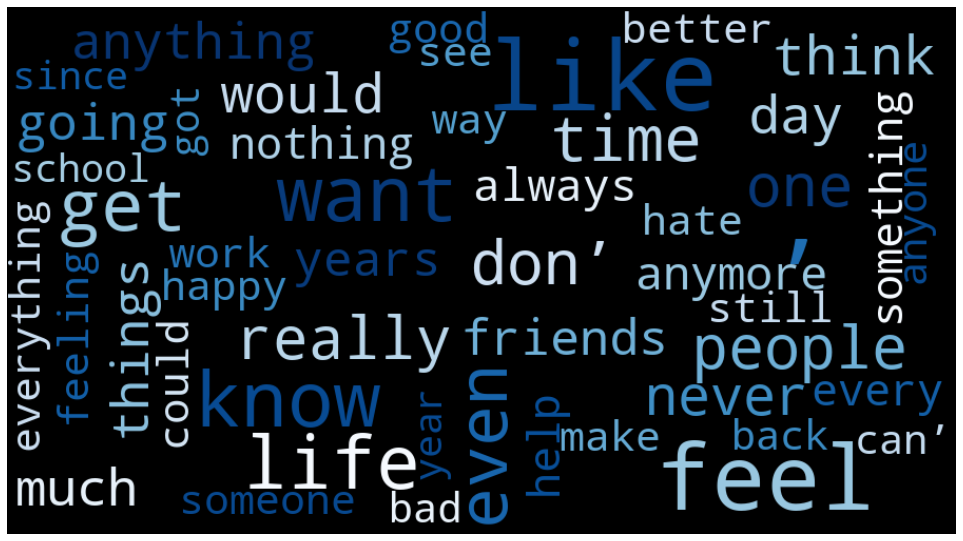

In [84]:
all_words = []
from collections import Counter
from wordcloud import WordCloud 

for line in df['no_depression']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = collections.Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
dataset = df.filter(['clean_comment','category'], axis=1)
dataset.head()

,clean_comment,category
0,understand that most people who reply immedia...,1
1,welcome depression check post place take momen...,1
2,don’ want kill myself just want happen natura...,1
3,’ been very depressed and drinking feelings ov...,1
4,everything seemed fine when was high school ha...,1


In [87]:
dataset.to_csv('redt_dataset.csv', index = False, sep=",", encoding="utf-8")